<center><h2> LOGIN DATA ANALYTICS

In [1]:
# import packages
import pandas as pd 
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
plt.style.use("ggplot")
from sklearn.metrics import *
plt.rcParams["figure.figsize"] = (15,5)
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

#### Read data into Pandas DataFrame

In [2]:
df = pd.read_csv("login data.csv")
df['TWOFACTORAUTH'] = df['TWOFACTORAUTH'].map({0:'No', 1:'Yes'},na_action=None)

df.head()

,FORESEE_RESPONDENT,FORESEE_SESSION_ID,DAY,SURVEY_CATEGORY,PRODUCT,PLATFORM,MAIN_TASK,CSAT,EFFORT,LOGIN,FORESEE_SESSION,EVENT_DATE,LOGIN_SUCCESS,EVNTS,LOGIN_EVNTS,LOGIN_ATTEMPTS,TWOFACTORAUTH,FORGOT_ID,FORGOT_PWD
0,YgsAQUdpoMRMh9BcoJwBEw4C,0037021d-7869-431f-a7df-eb4bc984f193,3/21/2022,Account Management,Wireless,Desktop,Check usage,77.78,3,Login Success-First Attempt,0037021d-7869-431f-a7df-eb4bc984f193,3/21/2022,1,16,5,2,Yes,0,0
1,EQcUwUopdcosddVFtZNZVw4C,004140f4-bd3b-4603-88f3-83b75b0c25e9,5/27/2022,Sales,Wireless,Desktop,Add a line to my current wireless service,51.85,4,Login Unsuccessful,004140f4-bd3b-4603-88f3-83b75b0c25e9,5/27/2022,0,18,7,3,Yes,0,0
2,Yk10xNphhA1x9108FItFlg4C,0084b056-c8cb-42f1-96d9-bb10e24ee7b3,6/20/2022,Support,Wireless,Desktop,"Voicemail help - setup, reset or troubleshoot ...",100.00,8,Login Success-First Attempt,0084b056-c8cb-42f1-96d9-bb10e24ee7b3,6/20/2022,0,13,7,2,Yes,0,0
3,BENct1p4VpdwYkA1ARUEUw4C,008535f1-fd9b-4c4c-b4b4-b9a8c9e3a0d1,2/15/2022,Account Management,Wireless,Desktop,"Add, change or downgrade plans and features (e...",74.07,4,Login Success-First Attempt,008535f1-fd9b-4c4c-b4b4-b9a8c9e3a0d1,2/15/2022,1,37,6,4,Yes,0,0
4,blWRyojK5rAckuyDBTfjkLFPcdDF21df,009a7653-3829-41e1-a11e-8a94f4c17b1d,6/17/2022,Support,BB,Mobile Web,Troubleshooting - fix a problem with my device...,0.00,1,Login Unsuccessful,009a7653-3829-41e1-a11e-8a94f4c17b1d,6/17/2022,-2,13,2,1,No,0,0


In [3]:
df['FORESEE_RESPONDENT'].value_counts().sort_values()

sZ4Y4Q0N1ZEUcJ0dt1VUAQ4C            1
wkUQAsFNAtIcMgcYhBdRBw4C            1
gY7F0hRv2ZQmRLBE9KTXGEsr423mvGkN    1
ZghN8U1txVghItgB40190Q4C            1
BoNN1BQxN8MRVNktRIol9A4C            1
                                   ..
BEIysS6ck5wA3vXGIePshohWvoX5PW4G    1
dyKHYBODIr0esP1WzO7JQAuYpEjo8XHd    2
oYhRpZtNYEdoBAhYUoJlEw4C            2
1YB0glF9NtZdxMMAk4QJcQ4C            2
d8RhdEhxdkMBYwVFkxllRw4C            2
Name: FORESEE_RESPONDENT, Length: 93595, dtype: int64

In [4]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
            
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

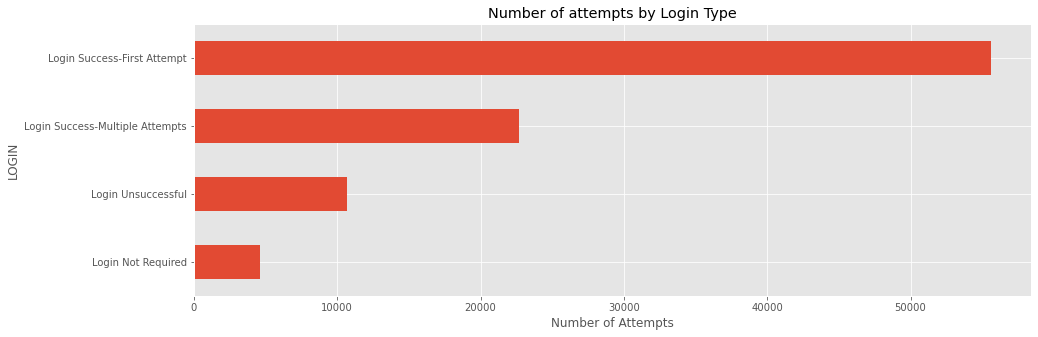

In [5]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(15,5))
plt.style.use('ggplot')

plt.title('Number of attempts by Login Type')
plt.xlabel('Number of Attempts')

ax = df.groupby([df['LOGIN']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

# with_hue(ax, df.LOGIN, 4, 2)
without_hue(ax, df.LOGIN)

#### Various LOGINs and CSAT score distribution

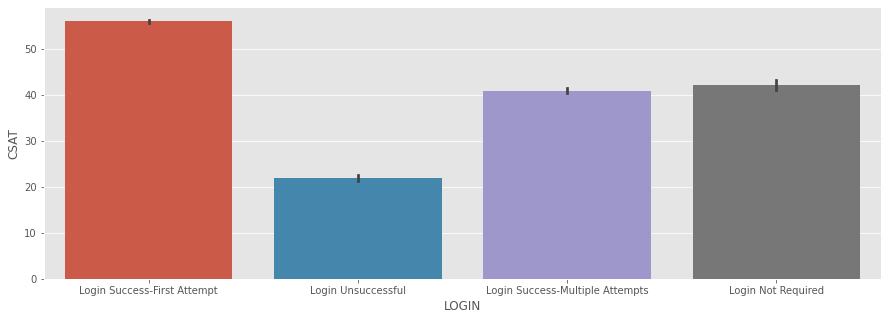

In [6]:
ax = sns.barplot(x = 'LOGIN', y = 'CSAT', data = df)

#### Login attempts and login type

<AxesSubplot:xlabel='LOGIN', ylabel='LOGIN_ATTEMPTS'>

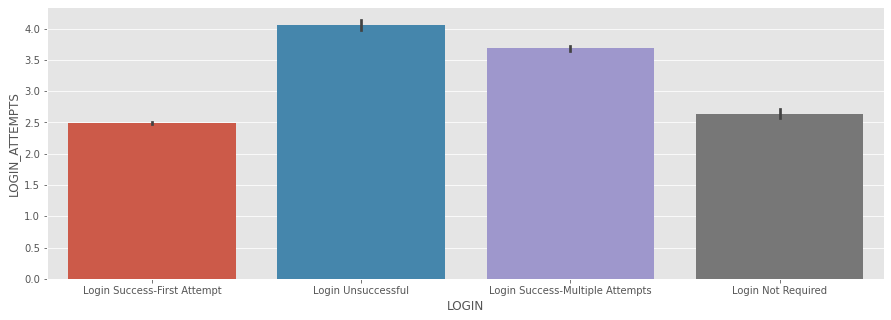

In [7]:
sns.barplot(x = 'LOGIN', y = 'LOGIN_ATTEMPTS', data = df)

### Average login attempts in each login type

#### Number of Login attempts repitition for different login types

In [8]:
ctab = pd.crosstab(df['LOGIN'],df['LOGIN_ATTEMPTS']).style.background_gradient(cmap='Reds')
display(ctab)

### Darker color means higher number

LOGIN_ATTEMPTS,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,45,48,49,50,54,55,56,83,88,105,118
LOGIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Login Not Required,1249,1679,772,383,186,122,67,54,24,27,14,5,7,9,1,2,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Login Success-First Attempt,12869,20230,14474,4143,1751,901,441,307,171,112,56,42,25,29,16,6,6,7,3,6,3,1,2,0,1,2,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Login Success-Multiple Attempts,4225,5502,4108,2641,1908,1407,857,669,430,283,165,141,83,90,44,30,27,13,15,12,9,5,6,4,4,5,3,1,1,2,2,2,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0
Login Unsuccessful,2055,3028,1346,1283,597,677,323,354,180,193,126,109,76,72,32,44,32,30,24,21,10,10,6,6,5,2,8,5,2,4,0,1,4,3,1,1,1,3,0,0,2,2,0,0,1,1,1,0,1,1,0,1,1


#### Login Success and Login Attempts

In [9]:
ctab = pd.crosstab(df['LOGIN_SUCCESS'].astype(str),df['LOGIN_ATTEMPTS']).style.background_gradient(cmap='Reds')
display(ctab)

LOGIN_ATTEMPTS,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,45,48,49,50,54,55,56,83,88,105,118
LOGIN_SUCCESS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-2,5609,410,58,31,7,9,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2817,4885,2736,1848,886,846,403,432,182,195,129,110,85,84,30,40,27,23,22,23,9,12,9,9,7,4,7,3,2,3,2,3,1,2,0,1,2,2,0,0,2,2,0,1,1,0,1,0,1,1,1,1,1
1,11972,25144,17906,6571,3549,2252,1281,950,622,420,232,187,106,116,63,42,39,28,20,16,13,6,5,1,3,5,6,4,1,3,0,0,3,2,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0


## Two factor authertication

#### Count of two factor authentication

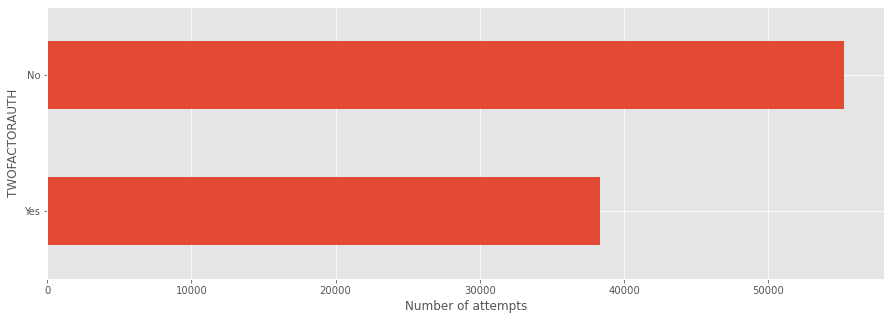

In [10]:
df.groupby([df['TWOFACTORAUTH']]).size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Number of attempts")
plt.show()

#### Login attempts with 2 factor authentication

Text(0.5, 1.0, 'Login attempts with highest number of two factor authenitcation')

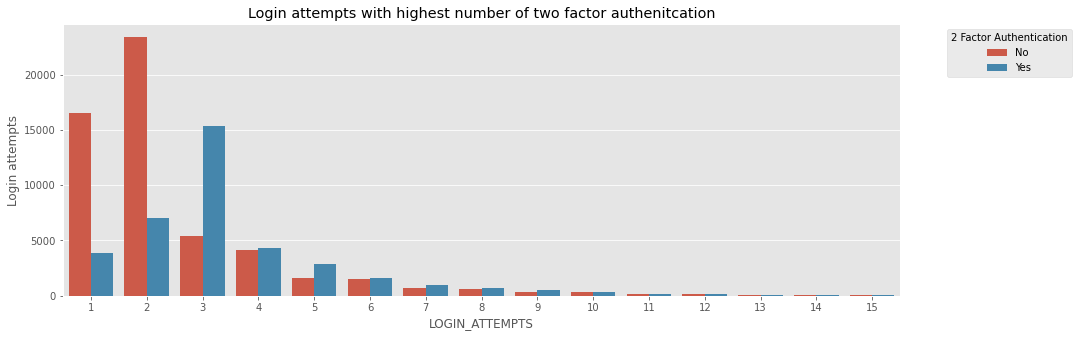

In [11]:
dff = df[['LOGIN_ATTEMPTS', 'TWOFACTORAUTH']].value_counts().reset_index().sort_values(by = 'LOGIN_ATTEMPTS', ascending = True).head(30)
sns.barplot(x = 'LOGIN_ATTEMPTS', y  = 0, hue = 'TWOFACTORAUTH', data = dff)
plt.legend(title='2 Factor Authentication', bbox_to_anchor=(1.05, 1), loc='upper left', )
plt.ylabel("Login attempts")
plt.title("Login attempts with highest number of two factor authenitcation")

#### Login Events and 2 factor authentication

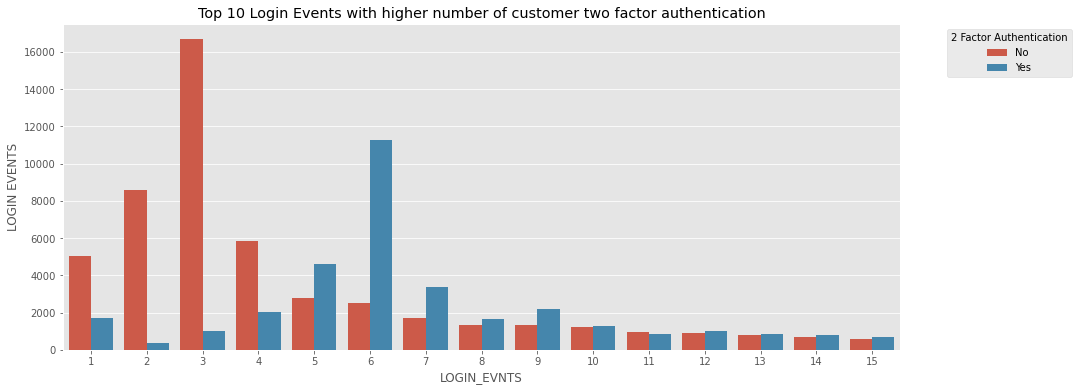

In [12]:
plt.figure(figsize=(15,6))

    
dff2 = df[['LOGIN_EVNTS', 'TWOFACTORAUTH']].value_counts().reset_index().sort_values(by = 'LOGIN_EVNTS', ascending = True)
dff2 = dff2[dff2["LOGIN_EVNTS"] > 0].head(30)
sns.barplot(x = 'LOGIN_EVNTS', y  = 0, hue = 'TWOFACTORAUTH', data = dff2.sort_values(0, ascending = False))
plt.legend(title='2 Factor Authentication', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("LOGIN EVENTS")

plt.title("Top 10 Login Events with higher number of customer two factor authentication");

#### CSAT and Two factor authentication

<AxesSubplot:xlabel='TWOFACTORAUTH', ylabel='CSAT'>

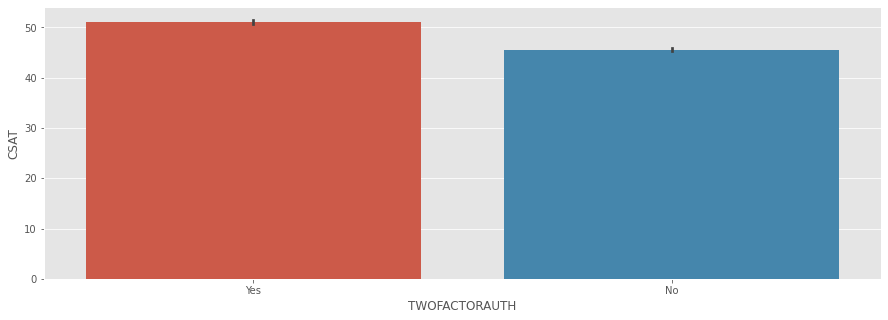

In [13]:
sns.barplot(x = 'TWOFACTORAUTH', y = 'CSAT', data = df)

#### Main Task and Two factor authentication

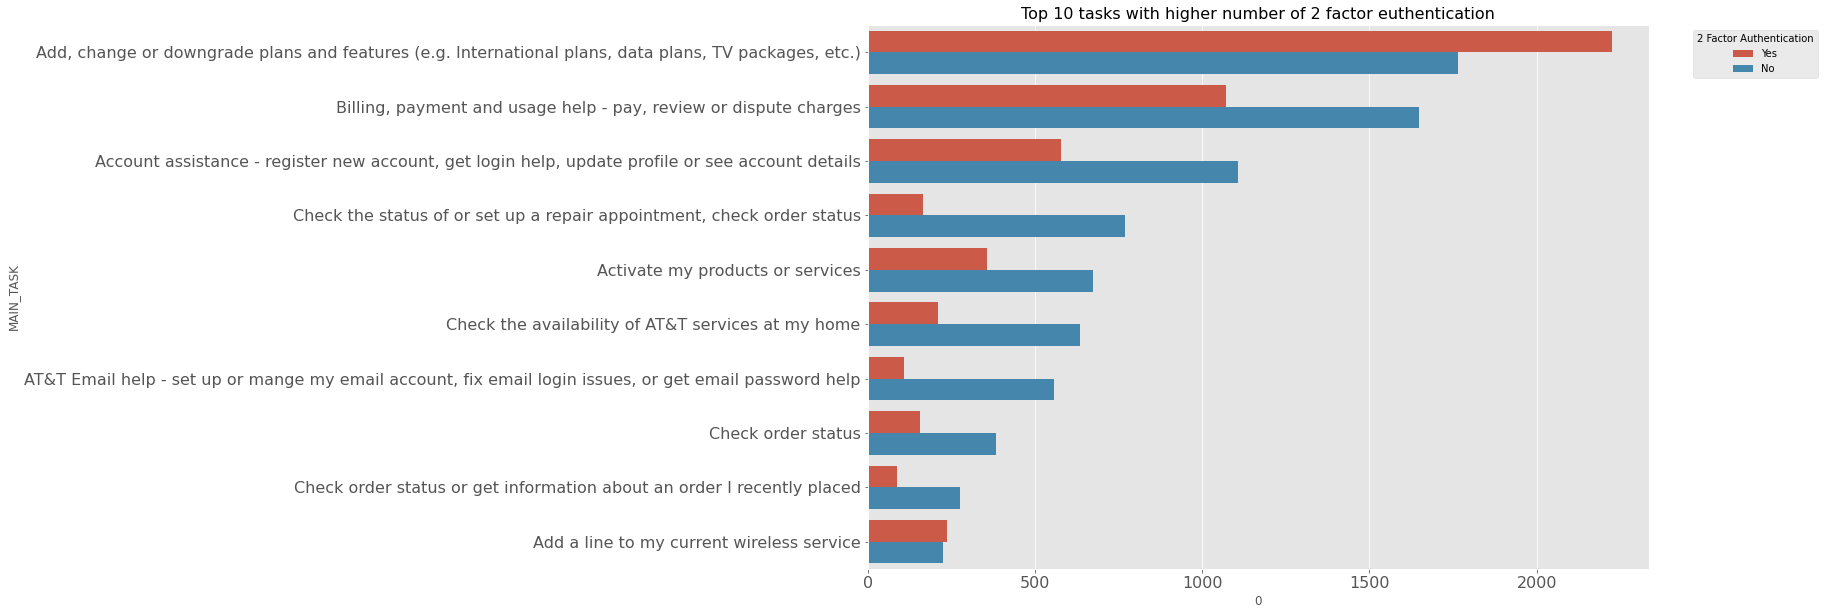

In [14]:
plt.figure(figsize=(14,10))    
    
df3 = df[['MAIN_TASK', 'TWOFACTORAUTH']].value_counts().reset_index().sort_values(by = 'MAIN_TASK', ascending = True).head(20)
sns.barplot(y = 'MAIN_TASK', x  = 0, hue = 'TWOFACTORAUTH', data = df3.sort_values(0, ascending = False))
plt.legend(title='2 Factor Authentication', bbox_to_anchor=(1.05, 1), loc='upper left', )
plt.title("Top 10 tasks with higher number of 2 factor euthentication", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);

__Inference:__ This plot shows that majority of tasks required Two factor authentication from Customers.

### Top 10 most repetitive tasks performed by customers and CSAT score

In [15]:
main_task = list(df['MAIN_TASK'].value_counts().sort_values()[-10:].index)

main_task = df[df["MAIN_TASK"].isin(main_task)]

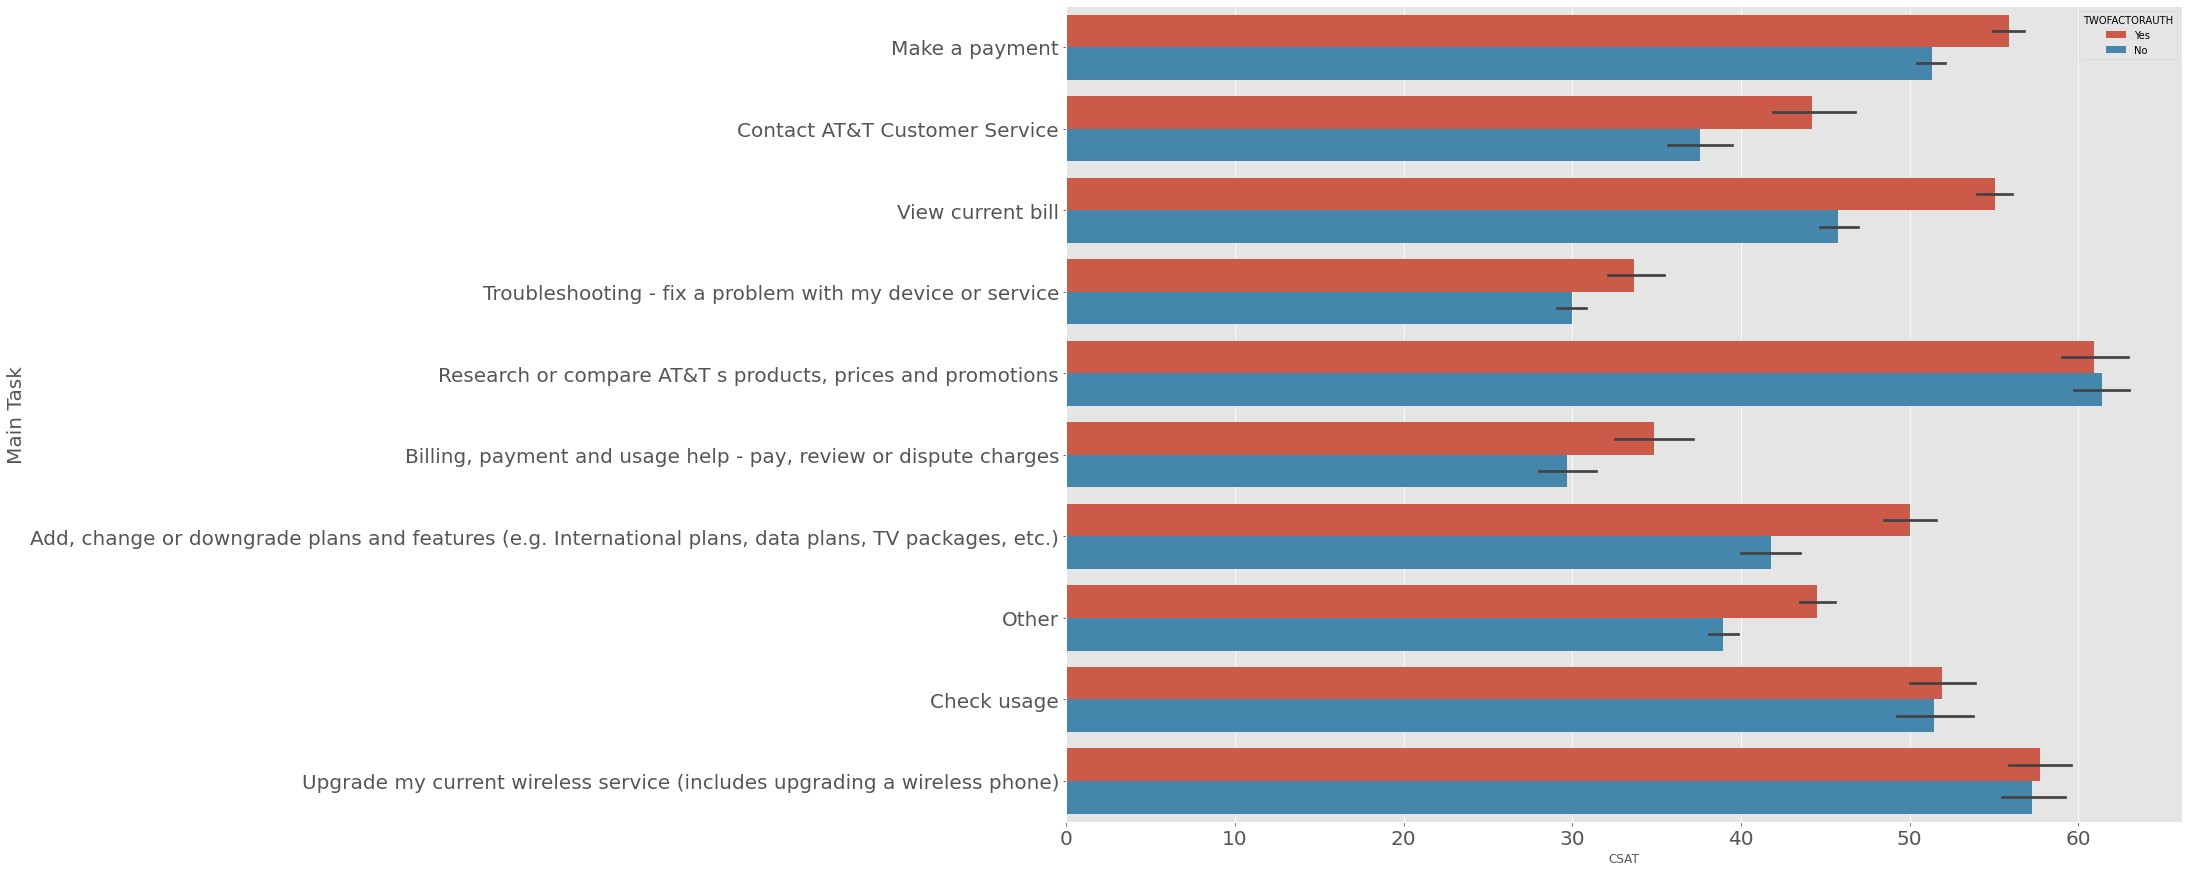

In [27]:
plt.figure(figsize=(20,15))

sns.barplot(y = 'MAIN_TASK', x = 'CSAT', data = main_task.sort_values(ascending = False, by = 'CSAT'), orient = 'horizontal', hue = 'TWOFACTORAUTH')
plt.xticks(fontsize = 20)
plt.ylabel('Main Task', fontsize = 20)
plt.yticks(fontsize = 20);

#### Most repitative tasks and ratio of login success

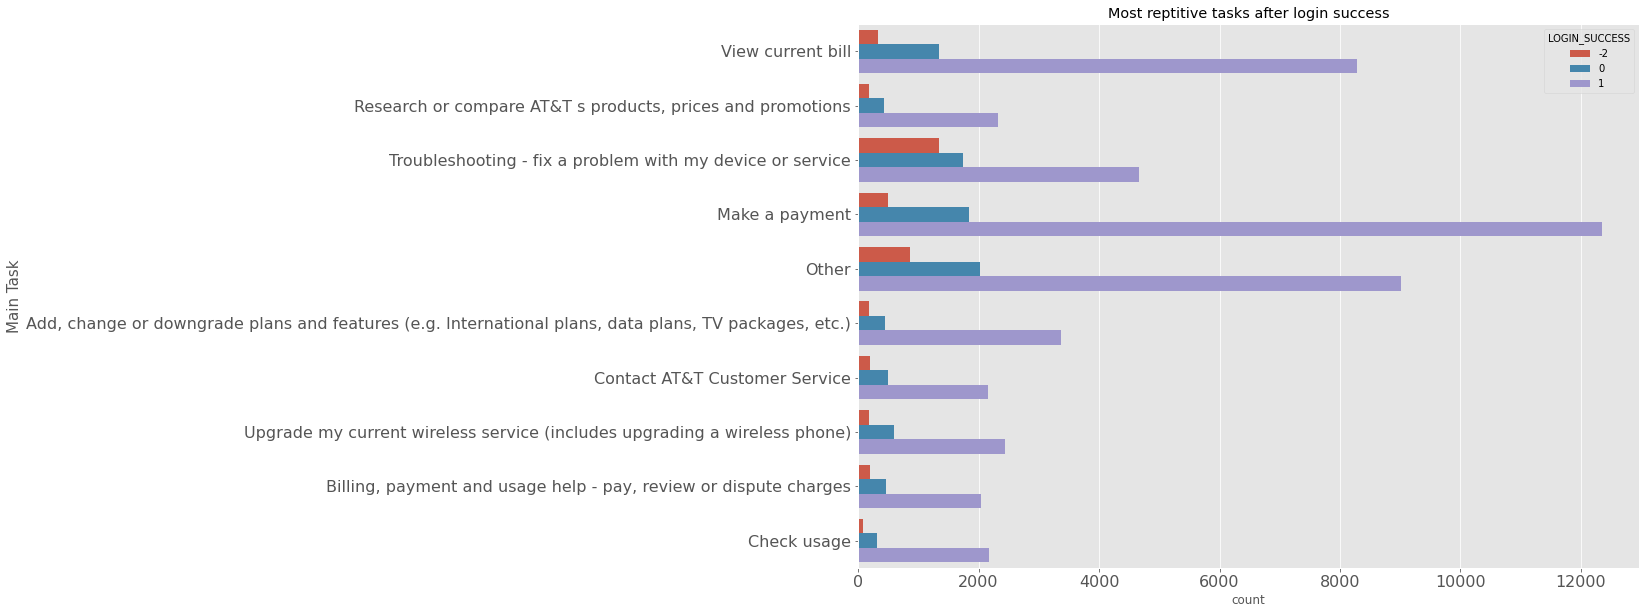

In [17]:
plt.figure(figsize=(14,10))

tasks_10 = list(df.groupby([df['MAIN_TASK']]).size().sort_values(ascending=False)[:10].index)
top_10T = df.loc[df['MAIN_TASK'].isin(tasks_10)]

sns.countplot(y = 'MAIN_TASK', hue = 'LOGIN_SUCCESS', data = top_10T.sort_values(by = 'LOGIN_SUCCESS'))
plt.ylabel("Main Task", fontsize = 15)
plt.title("Most reptitive tasks after login success")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);

#### Login attempts and forgot ID

In [18]:
df[['LOGIN_ATTEMPTS', 'FORGOT_ID']].value_counts().reset_index().sort_values(by = 'LOGIN_ATTEMPTS', ascending = True)

,LOGIN_ATTEMPTS,FORGOT_ID,0
2,1,0,19388
10,1,1,1010
0,2,0,28665
6,2,1,1774
1,3,0,19598
...,...,...,...
67,56,0,1
66,83,0,1
73,88,0,1
68,105,0,1


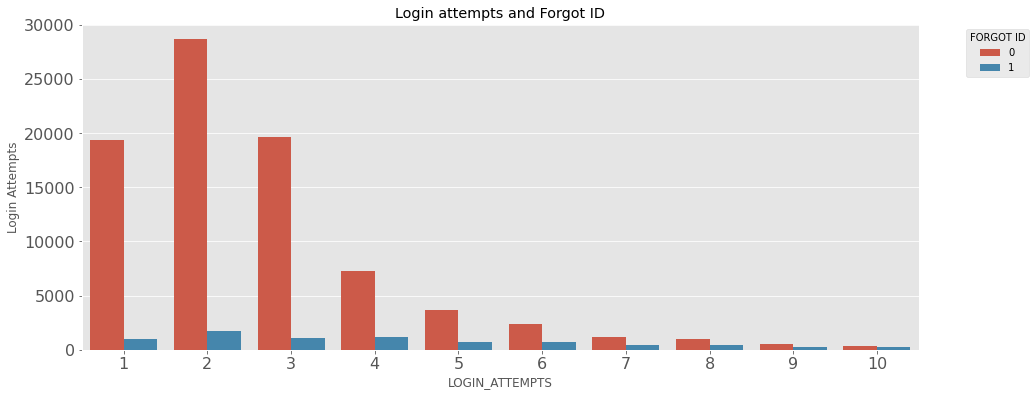

In [19]:
plt.figure(figsize=(15,6))

df3 = df[['LOGIN_ATTEMPTS', 'FORGOT_ID']].value_counts().reset_index().sort_values(by = 'LOGIN_ATTEMPTS', ascending = True).head(20)
sns.barplot(x = 'LOGIN_ATTEMPTS', y  = 0, hue = 'FORGOT_ID', data = df3.sort_values(0, ascending = False))

plt.legend(title='FORGOT ID', bbox_to_anchor=(1.05, 1), loc='upper left', )
plt.ylabel("Login Attempts")
plt.title("Login attempts and Forgot ID")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);

__Inference:__ According to the above data, only a small proportion of login attempts were the result of customer ID loss.

#### Login Attempts and forgot password

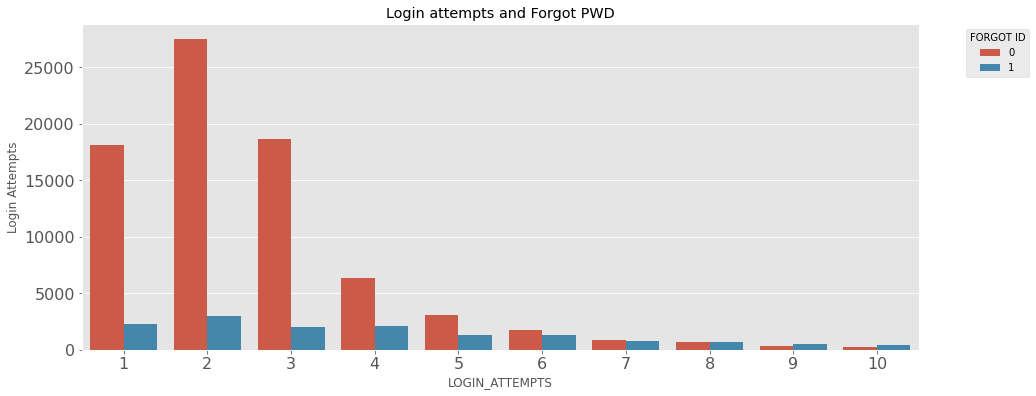

In [20]:
plt.figure(figsize=(15,6))

df4 = df[['LOGIN_ATTEMPTS', 'FORGOT_PWD']].value_counts().reset_index().sort_values(by = 'LOGIN_ATTEMPTS', ascending = True).head(20)
sns.barplot(x = 'LOGIN_ATTEMPTS', y  = 0, hue = 'FORGOT_PWD', data = df4.sort_values(0, ascending = False))

plt.legend(title='FORGOT ID', bbox_to_anchor=(1.05, 1), loc='upper left', )
plt.ylabel("Login Attempts")
plt.title("Login attempts and Forgot PWD")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);

__Inference:__ The data shows that a higher percentage of login attempts result from forgotten passwords as compared to forgotten IDs.

#### Most repeating tasks and frequency of password loss

In [21]:
dff2 = df[['MAIN_TASK', "PRODUCT", 'FORGOT_PWD']].groupby(['PRODUCT', 'MAIN_TASK'])[['FORGOT_PWD']].sum().sort_values(by = 'FORGOT_PWD', ascending=False).head(50)

# Percentage by lambda and DataFrame.apply() method.
df3 = dff2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).sort_values(by = 'FORGOT_PWD', ascending=False).style.background_gradient(cmap='Reds')
df3

In [22]:
df2 = df[['MAIN_TASK', "PLATFORM", 'FORGOT_PWD']].groupby(['PLATFORM', 'MAIN_TASK'])[['FORGOT_PWD']].sum().sort_values(by = 'FORGOT_PWD', ascending=False).head(30)


# Percentage by lambda and DataFrame.apply() method.
df4 = df2.groupby(level=0).apply(lambda x:round(100 * x / float(x.sum()),)).sort_values(by = 'FORGOT_PWD', ascending=False).style.background_gradient(cmap='Reds')
df4

__Inference:__ The above results show the frquence of forgot passsowrd for different tasks and customers coming from different products and platoforms.

#### Login, CSAT and Two factor authetication

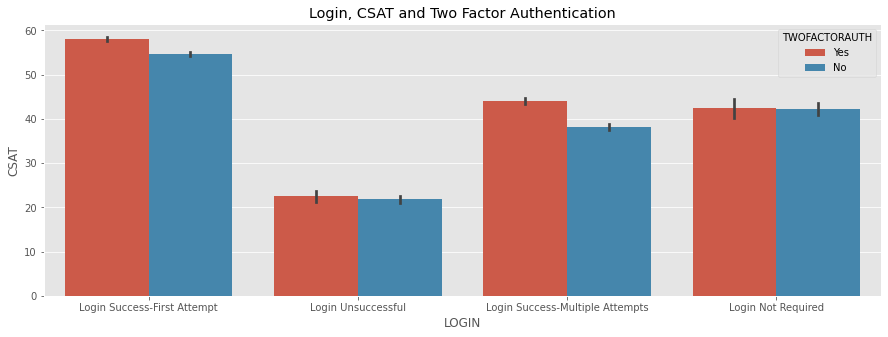

In [23]:
sns.barplot(x = 'LOGIN', y = 'CSAT', hue = 'TWOFACTORAUTH', data = df)
plt.title("Login, CSAT and Two Factor Authentication");

<center><h2> THE END